<a href="https://colab.research.google.com/github/AmaroRegly/Paid-Campaign-Data/blob/main/Paid_Campaign_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries and Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ad_df = pd.read_csv('/content/drive/MyDrive/Data Analyst/Datasets/KAG_conversion_data.csv')

#Data Engineering and DataCleaning

##Feature Engineering

In [5]:
#CPC (total spent / total clicks)
ad_df['CPC'] = ad_df['Spent'] / ad_df['Clicks'].replace(0, 1).round(2)


In [6]:
#CPA (Ttotal spent / total conversion)
ad_df['CPA'] = ad_df['Spent'] / ad_df['Total_Conversion'].replace(0, 1).round(2)

In [7]:
#CPM (total spent / (total impressions / 1000)
ad_df['CPM'] = ad_df['Spent'] / (ad_df['Impressions'] / 1000).round(2)

In [8]:
#Ad conversion rate
ad_df['AD_Conversion'] = (ad_df['Clicks'] / ad_df['Impressions'] * 100).replace(0, 1).round(2)

In [9]:
ad_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC,CPA,CPM,AD_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1.43,0.715,0.194558,0.01
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.91,0.910,0.101904,0.01
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.00,0.000,0.000000,1.00
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1.25,1.250,0.293427,0.02
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1.29,1.290,0.312349,0.02


##Searching for null values

In [10]:
ad_df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
CPC                    0
CPA                    0
CPM                    0
AD_Conversion          0
dtype: int64

##Searching for duplicate values

In [11]:
ad_df.duplicated().sum()

0

In [12]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  CPC                  1143 non-null   float64
 12  CPA                  1143 non-null   float64
 13  CPM                  1143 non-null   float64
 14  AD_Conversion        1143 non-null   float64
dtypes: float64(5), int64(8), object(2)
mem

#Data Exploration

In [13]:
ad_df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC,CPA,CPM,AD_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,1.227812,16.222206,0.239389,0.197533
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.614889,24.570539,0.160940,0.377649
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,1.234500,1.390000,0.148746,0.010000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,1.450000,8.332500,0.248821,0.020000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,1.600000,21.559808,0.332733,0.030000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,2.212000,332.989999,1.510638,1.000000


##Are there any campaigns that stand out among clicks and spend?


In [14]:
#Identificando quantas campanhas temos no dataset.
ad_df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

In [15]:
#Identificando quantos anúncios tem dentro de cada campanha.
ad_df['xyz_campaign_id'].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

###Insights

These values mean how many ads there are within each campaign. We can see that the "916" campaign has much fewer ads than the other campaigns.

In [16]:
main_campaign = ad_df[['xyz_campaign_id', 'Spent', 'Impressions', 'Clicks', 'Total_Conversion']].groupby('xyz_campaign_id').sum().round(2)
main_campaign

,Spent,Impressions,Clicks,Total_Conversion
xyz_campaign_id,,,,
916,149.71,482925,113,58
936,2893.37,8128187,1984,537
1178,55662.15,204823716,36068,2669


In [17]:
main_campaign['CPC'] = (main_campaign['Spent'] / main_campaign['Clicks']).round(2)
main_campaign['CPA'] = (main_campaign['Spent'] / main_campaign['Total_Conversion']).round(2)
main_campaign['Camp_Conv'] = (main_campaign['Total_Conversion'] / main_campaign['Clicks'] * 100).round(2)
main_campaign

,Spent,Impressions,Clicks,Total_Conversion,CPC,CPA,Camp_Conv
xyz_campaign_id,,,,,,,
916,149.71,482925,113,58,1.32,2.58,51.33
936,2893.37,8128187,1984,537,1.46,5.39,27.07
1178,55662.15,204823716,36068,2669,1.54,20.86,7.40


###Insights

* In terms of cost per click, all campaigns present similar values, slightly above the average of 1.22.

* When it comes to acquisition cost, the "1178" campaign stands out, presenting higher expenses and a campaign conversion rate that is not as satisfactory when compared to the others. On the other hand, it is the campaign that brought the most conversions. Either it is a campaign that has been paying off (which we will see later) or it has been running for longer.

* It is worth highlighting the "916" campaign which presented a lower cost per acquisition with a higher conversion rate. It may be interesting to invest more resources in this campaign.



##How did the campaigns perform among different age groups?

In [18]:
#Identificando quais são as faixas etárias do nosso dataset
ad_df['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [19]:
age_camp = ad_df[['age', 'Spent', 'Impressions', 'Clicks', 'Total_Conversion']].groupby('age').sum().round(2)

In [20]:
age_camp['CPC'] = (age_camp['Spent'] / age_camp['Clicks']).round(2)
age_camp['CPA'] = (age_camp['Spent'] / age_camp['Total_Conversion']).round(2)
age_camp['Camp_Conv'] = (age_camp['Total_Conversion'] / age_camp['Clicks'] * 100).round(2)
age_camp

,Spent,Impressions,Clicks,Total_Conversion,CPC,CPA,Camp_Conv
age,,,,,,,
30-34,15252.40,67993019,9483,1431,1.61,10.66,15.09
35-39,11112.43,42104644,7094,626,1.57,17.75,8.82
40-44,11589.73,39604307,7736,523,1.50,22.16,6.76
45-49,20750.67,63732858,13852,684,1.50,30.34,4.94


###Insights

* The audience between 30-34 becomes the most profitable for the campaign. Because it has a lower acquisition cost compared to other age groups, with a much higher conversion rate, even with a lower number of clicks than the 45-49 age group, for example.

* It is worth paying attention to the 45-49 age group, which has the highest expenditure, many clicks, but little conversion.

##Is there a demographic group that responded better to campaigns?

In [21]:
demographic = ad_df[['age', 'gender' , 'Spent', 'Impressions', 'Clicks', 'Total_Conversion']].groupby(['age' , 'gender']).sum().round(2)
demographic

Spent  Impressions  Clicks  Total_Conversion
age   gender                                                 
30-34 F        7611.48     31571576    5099               619
      M        7640.92     36421443    4384               812
35-39 F        6061.35     21439505    4161               304
      M        5051.08     20665139    2933               322
40-44 F        7396.58     23396175    5177               322
      M        4193.15     16208132    2559               201
45-49 F       13433.21     38455591    9441               399
      M        7317.46     25277267    4411               285

In [22]:
demographic['CPC'] = (demographic['Spent'] / demographic['Clicks']).round(2)
demographic['CPA'] = (demographic['Spent'] / demographic['Total_Conversion']).round(2)
demographic['Camp_Conv'] = (demographic['Total_Conversion'] / demographic['Clicks'] * 100).round(2)
demographic

Spent  Impressions  Clicks  Total_Conversion   CPC    CPA  \
age   gender                                                                 
30-34 F        7611.48     31571576    5099               619  1.49  12.30   
      M        7640.92     36421443    4384               812  1.74   9.41   
35-39 F        6061.35     21439505    4161               304  1.46  19.94   
      M        5051.08     20665139    2933               322  1.72  15.69   
40-44 F        7396.58     23396175    5177               322  1.43  22.97   
      M        4193.15     16208132    2559               201  1.64  20.86   
45-49 F       13433.21     38455591    9441               399  1.42  33.67   
      M        7317.46     25277267    4411               285  1.66  25.68   

              Camp_Conv  
age   gender             
30-34 F           12.14  
      M           18.52  
35-39 F            7.31  
      M           10.98  
40-44 F            6.22  
      M            7.85  
45-49 F            4.23  
      M            6.46

###Insights

* As in the previous topic, we can see that the "30-34" audience was the one that responded best to the campaigns. Total conversions stand out from other age groups, as does the campaign's conversion rate.

* It is also worth highlighting that the male audience had a low cost per acquisition of 9.41 and a great conversion rate of 18.52

##How is the funnel between impressions, clicks, total conversions and approved conversions? At what stage can we improve?

In [44]:
funnel = ad_df[['Clicks' , 'Total_Conversion' , 'Approved_Conversion']].sum()
funnel

Clicks                 38165
Total_Conversion        3264
Approved_Conversion     1079
dtype: int64

<BarContainer object of 3 artists>

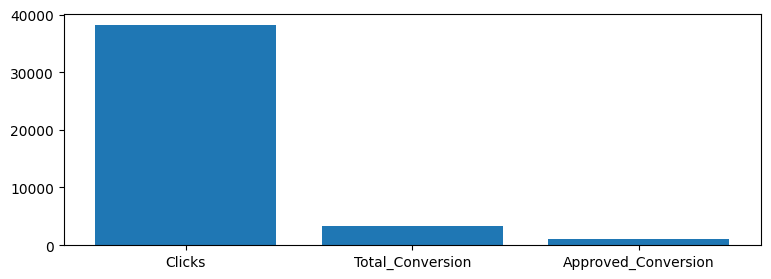

In [24]:
plt.figure(figsize=(9,3))
plt.bar(funel.index , funel.values)

###Insight

* Evaluating the funnel, we can see a bigger gap between Clicks and Total_Conversion. One suggestion is to work on the landing page to increase the conviction of people who have already clicked and increase the rate of people who contact our sales team.

In [25]:
conversions = ad_df[['Total_Conversion' , 'Approved_Conversion']].sum()
conversions

Total_Conversion       3264
Approved_Conversion    1079
dtype: int64

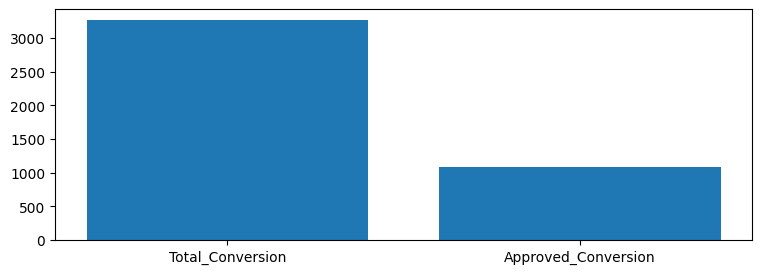

In [26]:
plt.figure(figsize=(9,3))
plt.bar(conversions.index , conversions.values)
plt.show()

In [27]:
conversions['CTR'] = (conversions['Approved_Conversion']) / (conversions['Total_Conversion']) * 100
conversions

Total_Conversion       3264.000000
Approved_Conversion    1079.000000
CTR                      33.057598
dtype: float64

###Insights

* To reduce the gap between Total_Conversions and Approved_Conversios, we can work better on our sales arguments, both in our communications (ads) and with our sales team, which is responsible for closing sales. This way, we make better use of leads that have already shown interest in our company.

##Which ads performed best in each campaign? (based on "Total_Conversions")

## Campaign 916

In [41]:
camp916 = ad_df.query('xyz_campaign_id == 916 and Clicks > 1')
camp916[['xyz_campaign_id' , 'ad_id' , 'Impressions'	,'Clicks'	,'Spent',	'Total_Conversion', 'CPC' , 'CPA']].round(2).sort_values(by=['Total_Conversion', 'Clicks'], ascending=False).head()

,xyz_campaign_id,ad_id,Impressions,Clicks,Spent,Total_Conversion,CPC,CPA
19,916,709183,21026,4,4.63,2,1.16,2.32
1,916,708749,17861,2,1.82,2,0.91,0.91
36,916,710480,57665,14,18.07,1,1.29,18.07
32,916,710045,47224,12,15.82,1,1.32,15.82
14,916,709059,14669,7,10.28,1,1.47,10.28


###Insights

* Within the top ads of the "916" campaign, the ad with ad_id "708749" catches our attention. This ad has the lowest CPA, converting the same number of customers as the ad with the highest spend and highest CPA (ad_id 709901).

* On the other hand, the ad_id "710480 and 710045" has shown a number of interesting clicks. It's worth taking inspiration from the creatives in this ad to optimize other ads that have a more advantageous CPA.


##Campaign 936

In [42]:
camp936 = ad_df.query('xyz_campaign_id == 936 and Clicks > 1')
camp936[['xyz_campaign_id' , 'ad_id' , 'Impressions'	,'Clicks'	,'Spent',	'Total_Conversion', 'CPC' , 'CPA']].round(2).sort_values(by=['Total_Conversion' , 'Clicks'], ascending=False).head(5)

,xyz_campaign_id,ad_id,Impressions,Clicks,Spent,Total_Conversion,CPC,CPA
151,936,738648,111090,38,51.97,5,1.37,10.39
146,936,738592,493821,116,176.38,4,1.52,44.09
90,936,734939,104648,24,33.33,4,1.39,8.33
195,936,748230,83929,21,27.73,4,1.32,6.93
472,936,951046,20050,4,4.66,4,1.16,1.16


###Insights

* The "738592" ad stands out negatively because it was the one that spent the most, and even so, other campaigns achieved similar results, having a much better cost-benefit ratio. One suggestion would be to pause this ad.

* The ad "951046" also attracts attention as it has 4 clicks and 4 conversions in total. It is interesting to keep an eye on it, as it could be an advantageous announcement or some error.

* Finally, the "748230" ad is the most advantageous, as it achieved a good number of total conversions, spending less and with the lowest CPC and CPA among the campaign's top ads. It is interesting to monitor it for possible optimizations.

##Campaign 1178

In [43]:
camp1178 = ad_df.query('xyz_campaign_id == 1178 and Clicks > 1')
camp1178[['xyz_campaign_id' , 'ad_id' , 'Impressions'	,'Clicks'	,'Spent',	'Total_Conversion', 'CPC' , 'CPA']].round(2).sort_values(by=['Total_Conversion' , 'Clicks'], ascending=False).head(5)

,xyz_campaign_id,ad_id,Impressions,Clicks,Spent,Total_Conversion,CPC,CPA
525,1178,1121100,3052003,340,639.95,60,1.88,10.67
528,1178,1121104,2080666,202,360.15,40,1.78,9.00
860,1178,1121814,2223278,421,612.30,38,1.45,16.11
574,1178,1121196,1392288,206,358.55,31,1.74,11.57
1116,1178,1314387,696612,152,223.19,31,1.47,7.20


###Insights

* It is notable that the 1178 campaign is the one that converts the most. It's worth researching whether it's because it's been running for longer or because it's more effective.

* The ad with ad_id "1121814" has the highest CPA and the second highest expense and did not bring a satisfactory amount of total conversions when compared to other ads. It might be interesting to rethink his strategy.

* Despite having one of the highest expenses, the ad_id "1121100" has been bringing satisfactory total conversions. Some adjustments to the offers can be made to try to lower the cost per click and the cost per acquisition.

#Which interest brought the best return in terms of total conversion?



In [31]:
#Identificando quantos interesses nós temos no dataset.
ad_df['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106])

In [32]:
ad_df['interest'].value_counts()

16     140
10      85
29      77
27      60
15      51
28      51
20      49
64      48
63      46
18      43
26      41
21      36
32      33
22      33
19      32
25      26
31      25
30      25
2       25
7       24
24      24
23      23
36      21
65      19
66      11
107      8
110      8
102      7
105      7
101      7
112      7
108      7
100      6
111      6
113      6
109      6
103      5
114      5
104      5
106      5
Name: interest, dtype: int64

In [33]:
interest_camp = ad_df[['interest' , 'Impressions' , 'Clicks', 'Spent' , 'Total_Conversion']].groupby('interest').sum().round(2).sort_values(by='Total_Conversion', ascending=False)
interest_camp['CPC'] = (interest_camp['Spent'] / interest_camp['Clicks']).round(2)
interest_camp['CPA'] = (interest_camp['Spent'] / interest_camp['Total_Conversion']).round(2)
interest_camp

,Impressions,Clicks,Spent,Total_Conversion,CPC,CPA
interest,,,,,,
16,31809524,5144,8084.91,411,1.57,19.67
29,18768653,3315,5045.19,306,1.52,16.49
10,17989844,3317,5086.38,269,1.53,18.91
27,16352527,3409,5176.17,240,1.52,21.57
15,10745856,1609,2597.26,195,1.61,13.32
28,10959830,2025,3205.85,146,1.58,21.96
20,6899907,1234,1960.77,129,1.59,15.20
63,8365640,1675,2484.06,101,1.48,24.59
19,6083217,1188,1940.36,97,1.63,20.00


###Insights

* Although interest "16" is the one that spent the most, it is also responsible for bringing more conversions with CPC and CAP within acceptable limits. This may be because it is the interest with the largest number of advertisements linked to it.

* It is worth highlighting the interest "29" which with only 77 ads, has an interesting result. Both in cost and conversions.